In [1]:
# We'll be using Sklearn library for this task..
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


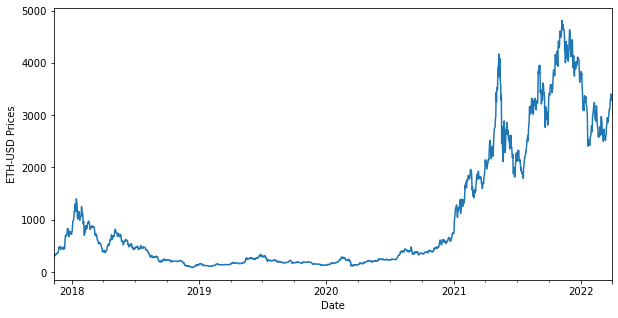

In [2]:
# Read data 
Df = yf.download('ETH-USD','2016-01-01','2022-03-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("ETH-USD Prices")
plt.show()

In [3]:
print("trainging days =",Df.shape)

trainging days = (1604, 1)


In [4]:
futureDays = 25

In [5]:
Df

,Close
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003
...,...
2022-03-27,3291.577637
2022-03-28,3336.634521
2022-03-29,3401.987793


In [8]:
Df.head(26)
Df.tail(26)

,Close,Prediction
Date,,
2022-03-06,2555.037354,3281.642822
2022-03-07,2497.771240,NaN
2022-03-08,2576.747559,NaN
2022-03-09,2729.783447,NaN
2022-03-10,2608.048584,NaN
2022-03-11,2559.562988,NaN
2022-03-12,2574.754150,NaN
2022-03-13,2518.944580,NaN
2022-03-14,2590.696045,NaN


In [6]:
Df["Prediction"] = Df[["Close"]].shift(-futureDays)


In [18]:
Df.tail(26)

,Close,Prediction
Date,,
2022-03-06,2555.037354,3281.642822
2022-03-07,2497.771240,NaN
2022-03-08,2576.747559,NaN
2022-03-09,2729.783447,NaN
2022-03-10,2608.048584,NaN
2022-03-11,2559.562988,NaN
2022-03-12,2574.754150,NaN
2022-03-13,2518.944580,NaN
2022-03-14,2590.696045,NaN


In [9]:
#x is the close price from Df

import numpy as np
x = np.array(Df.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 320.88400269]
 [ 299.25299072]
 [ 314.68099976]
 ...
 [2617.15600586]
 [2664.83105469]
 [2555.03735352]]


C:\Users\admin\AppData\Local\Temp/ipykernel_19400/506403064.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(Df.drop(["Prediction"], 1))[:-futureDays]


In [15]:
y

array([ 470.20401001,  463.28100586,  428.5880127 , ..., 3401.98779297,
       3385.15795898, 3281.64282227])

In [12]:
#y is the rest of the close price
y = np.array(Df["Prediction"])[:-futureDays]
print(y)

[ 470.20401001  463.28100586  428.5880127  ... 3401.98779297 3385.15795898
 3281.64282227]


In [ ]:
x.shape

# train test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [20]:
# Creating the decision tree regressor model


from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)


In [22]:
# creating the Linear Regression model


from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [23]:
xfuture = Df.drop(["Prediction"], 1)[:-futureDays]

C:\Users\admin\AppData\Local\Temp/ipykernel_19400/2900493697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xfuture = Df.drop(["Prediction"], 1)[:-futureDays]


In [27]:
xfuture.shape

(25, 1)

In [25]:
#taking the last 25 days of data
xfuture = xfuture.tail(futureDays)


In [ ]:
xfuture.shape

In [28]:

xfuture = np.array(xfuture)

In [29]:
#To get the last ‘x’ rows/days of the feature dataset:

print(xfuture)

[[3077.48217773]
 [2927.38354492]
 [2917.36279297]
 [2883.46337891]
 [2933.47900391]
 [3179.87719727]
 [3127.83007812]
 [2881.48193359]
 [2785.72753906]
 [2763.70117188]
 [2628.6484375 ]
 [2573.81616211]
 [2639.29931641]
 [2590.35961914]
 [2598.06713867]
 [2764.53564453]
 [2781.11181641]
 [2621.80175781]
 [2919.20117188]
 [2972.48510742]
 [2950.1184082 ]
 [2834.46899414]
 [2617.15600586]
 [2664.83105469]
 [2555.03735352]]


In [30]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [2682.85400391 2576.74755859 3106.67138672 2608.04858398 2559.56298828
 2574.75415039 2518.94458008 2608.04858398 2620.1496582  2772.05566406
 2814.85449219 2945.34301758 2946.25708008 2860.45922852 2897.9765625
 2973.13110352 3031.06713867 3108.06201172 3106.67138672 3143.17895508
 3291.57763672 3336.63452148 3401.98779297 3385.15795898 3281.64282227]


In [42]:
tpredictions = treePrediction

In [43]:
tpredictions

array([2682.85400391, 2576.74755859, 3106.67138672, 2608.04858398,
       2559.56298828, 2574.75415039, 2518.94458008, 2608.04858398,
       2620.1496582 , 2772.05566406, 2814.85449219, 2945.34301758,
       2946.25708008, 2860.45922852, 2897.9765625 , 2973.13110352,
       3031.06713867, 3108.06201172, 3106.67138672, 3143.17895508,
       3291.57763672, 3336.63452148, 3401.98779297, 3385.15795898,
       3281.64282227])

In [37]:
x.shape[0]

1579

In [44]:
#that means we are trying to capture the last 25 of the x

valid = Df[1579:]

In [45]:
valid

,Close,Prediction
Date,,
2022-03-07,2497.771240,NaN
2022-03-08,2576.747559,NaN
2022-03-09,2729.783447,NaN
2022-03-10,2608.048584,NaN
2022-03-11,2559.562988,NaN
2022-03-12,2574.754150,NaN
2022-03-13,2518.944580,NaN
2022-03-14,2590.696045,NaN
2022-03-15,2620.149658,NaN


In [ ]:
Df

In [46]:
valid["Predictions"] = tpredictions

C:\Users\admin\AppData\Local\Temp/ipykernel_19400/3468437286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = tpredictions


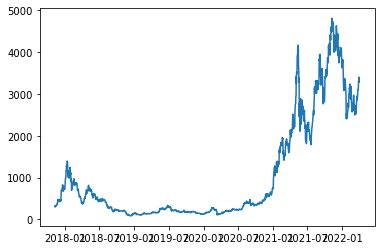

In [47]:
plt.plot(Df["Close"])

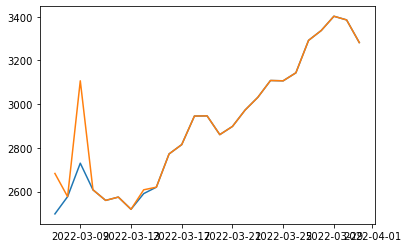

In [48]:
plt.plot(valid[["Close", "Predictions"]])

In [ ]:
valid

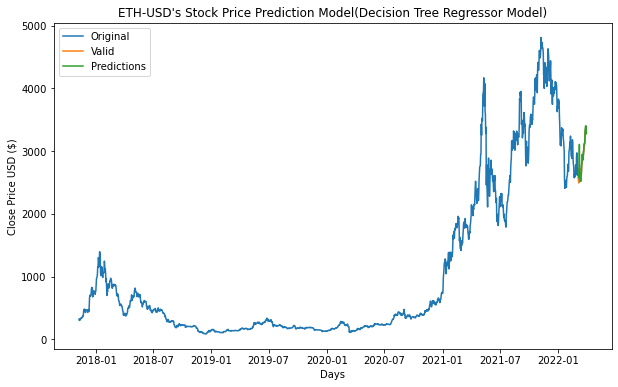

In [49]:

plt.figure(figsize=(10, 6))
plt.title("ETH-USD's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")


plt.plot(Df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [50]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [3076.73310507 2929.74621813 2919.9332098  2886.73657604 2935.71531008
 3177.00533858 3126.03722599 2884.79620874 2791.02693118 2769.45720011
 2637.20428997 2583.50876115 2647.63436187 2599.70925014 2607.25698246
 2770.27437303 2786.50689864 2630.49955113 2921.73347665 2973.91276478
 2952.00975722 2838.75791055 2625.95011184 2672.63679299 2565.11926243]


C:\Users\admin\AppData\Local\Temp/ipykernel_19400/1922476404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["LPredictions"] = Lpredictions


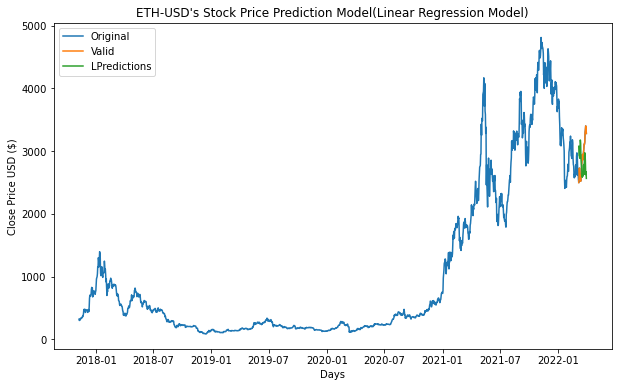

In [52]:
Lpredictions = linearPrediction
valid = Df[x.shape[0]:]
valid["LPredictions"] = Lpredictions
plt.figure(figsize=(10, 6))
plt.title("ETH-USD's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Df["Close"])
plt.plot(valid[["Close", "LPredictions"]])
plt.legend(["Original", "Valid", "LPredictions"])
plt.show()